In [1]:
# libraries used
import boto3
import diff_classifier.aws as aws
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from diff_predictor import core, data_process, predxgboost, spatial

import random

from os import listdir, getcwd, chdir
from os.path import isfile, join
import os

from matplotlib import colors as plt_colors

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

import xgboost as xgb
# from xgboost import cv

import shap

from itertools import combinations

Using current directory for loading/saving: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nancegpu/code/Users/nlsschim/diff_predictor/notebooks
To change current directory, call change_dir(...)


In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nancegpu/code/Users/nlsschim/diff_predictor/notebooks
Using current directory for loading data: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nancegpu/code/Users/nlsschim/diff_predictor


In [3]:
dataset_path = workbookDir + '/data/age_feature_data/'
filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]

In [4]:
sampled_filelist = []

class_lens = [0, 15, 30, 45]
for i in range(len(class_lens)-1):
    rand_integers = random.sample(set(np.arange(class_lens[i], class_lens[i+1])), 15)
    for rand_int in rand_integers:
        sampled_filelist.append(filelist[rand_int])
print(sampled_filelist)

['features_NT_brain_2_slice_2_vid_1.csv', 'features_NT_brain_2_slice_1_vid_5.csv', 'features_NT_brain_2_slice_3_vid_5.csv', 'features_NT_brain_2_slice_2_vid_3.csv', 'features_NT_brain_2_slice_2_vid_4.csv', 'features_NT_brain_2_slice_1_vid_1.csv', 'features_NT_brain_2_slice_3_vid_3.csv', 'features_NT_brain_2_slice_3_vid_4.csv', 'features_NT_brain_2_slice_3_vid_2.csv', 'features_NT_brain_2_slice_2_vid_5.csv', 'features_NT_brain_2_slice_1_vid_4.csv', 'features_NT_brain_2_slice_1_vid_3.csv', 'features_NT_brain_2_slice_3_vid_1.csv', 'features_NT_brain_2_slice_1_vid_2.csv', 'features_NT_brain_2_slice_2_vid_2.csv', 'features_P14_40nm_s3_v3.csv', 'features_P14_40nm_s2_v3.csv', 'features_P14_40nm_s3_v1.csv', 'features_P14_40nm_s1_v3.csv', 'features_P14_40nm_s3_v5.csv', 'features_P14_40nm_s3_v4.csv', 'features_P14_40nm_s1_v1.csv', 'features_P14_40nm_s3_v2.csv', 'features_P14_40nm_s1_v4.csv', 'features_P14_40nm_s2_v4.csv', 'features_P14_40nm_s1_v5.csv', 'features_P14_40nm_s2_v2.csv', 'features_P1

In [20]:
for i in range(1,16):
    comb = combinations(filelist[0:15], i)
    print(len(list(comb))**3)

3375
1157625
94196375
2543302125
27081081027
125375375125
266468362875
266468362875
125375375125
27081081027
2543302125
94196375
1157625
3375
1


In [21]:
fstats_tot = data_process.generate_fullstats(dataset_path, filelist, ['P14', 'NT', 'P70'], 'age')

P14
NT
Adding file features_NT_brain_2_slice_1_vid_1.csv size: (416, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_1_vid_2.csv size: (833, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_1_vid_3.csv size: (1017, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_1_vid_4.csv size: (878, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_1_vid_5.csv size: (467, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_2_vid_1.csv size: (2488, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_2_vid_2.csv size: (2322, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_2_vid_3.csv size: (1735, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_2_vid_4.csv size: (1650, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_2_vid_5.csv size: (2100, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_3_vid_1.csv size: (562, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_3_vid_2.csv size: (853, 91)
P70
P14
NT
Adding file features_NT_brain_2_slice_3_vid_3.csv size: (817, 9

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



P14
NT
P70
Adding file features_P70_40nm_s1_v2.csv size: (12, 67)
P14
NT
P70
Adding file features_P70_40nm_s1_v3.csv size: (25, 67)
P14
NT
P70
Adding file features_P70_40nm_s1_v4.csv size: (21, 67)
P14
NT
P70
Adding file features_P70_40nm_s1_v5.csv size: (17, 67)
P14
NT
P70
Adding file features_P70_40nm_s2_v1.csv size: (148, 67)
P14
NT
P70
Adding file features_P70_40nm_s2_v2.csv size: (148, 67)
P14
NT
P70
Adding file features_P70_40nm_s2_v3.csv size: (240, 67)
P14
NT
P70
Adding file features_P70_40nm_s2_v4.csv size: (308, 67)
P14
NT
P70
Adding file features_P70_40nm_s2_v5.csv size: (186, 67)
P14
NT
P70
Adding file features_P70_40nm_s3_v1.csv size: (2625, 67)
P14
NT
P70
Adding file features_P70_40nm_s3_v2.csv size: (1401, 67)
P14
NT
P70
Adding file features_P70_40nm_s3_v3.csv size: (2322, 67)
P14
NT
P70
Adding file features_P70_40nm_s3_v4.csv size: (2909, 67)
P14
NT
P70
Adding file features_P70_40nm_s3_v5.csv size: (4162, 67)


In [414]:
# The column Deff2 currently has a super high number (~97%) of null values, so might be worth not including
# As such, it is commented out below
# columns = [
#     'alpha', # Fitted anomalous diffusion alpha exponenet
#     'D_fit', # Fitted anomalous diffusion coefficient
#     'kurtosis', # Kurtosis of track
#     'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
#     'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
#     'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
#     'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
#     'elongation', # Est. of amount of extension of trajectory from centroid
#     'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
#     'fractal_dim', # Measure of how complicated a self similar figure is
#     'trappedness', # Probability that a particle with Deff is trapped in a region
#     'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
#     'straightness', # Ratio of net displacement to the sum of squared step lengths
#     'MSD_ratio', # MSD ratio of the track
#     #'frames', # Number of frames the track spans
#     'Deff1', # Effective diffusion coefficient at 0.33 s
#  #   'Deff2', # Effective diffusion coefficient at 3.3 s
#     'Mean alpha',
#     'Mean D_fit',
#     'Mean kurtosis',
#     'Mean asymmetry1',
#     'Mean asymmetry2',
#     'Mean asymmetry3',
#     'Mean AR',
#     'Mean elongation',
#     'Mean boundedness',
#     'Mean fractal_dim',
#     'Mean trappedness',
#     'Mean efficiency',
#     'Mean straightness',
#     'Mean MSD_ratio',
#     'Mean Deff1',
#     #'Mean Deff2',
#     'X',
#     'Y',
#     'age'
# ]

# target = 'age'

In [240]:
features = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
#     'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    #'angle_mean', # Mean turning angle which is counterclockwise angle from one frame point to another
    #'angle_mag_mean', # Magnitude of the turning angle mean
    #'angle_var', # Variance of the turning angle
    #'dist_tot', # Total distance of the trajectory
    #'dist_net', # Net distance from first point to last point
    #'progression', # Ratio of the net distance traveled and the total distance
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

target = 'age'

In [241]:
# ecm = fstats_tot[features]
# ecm = ecm[~ecm.isin([np.nan, np.inf, -np.inf]).any(1)] # removes rows with nan or inf points

# #ecm = ecm.dropna()
# ecm.shape

In [246]:
ecm = fstats_tot[features + [target, 'Track_ID', 'X', 'Y']]
print(ecm.shape)
ecm = ecm[~ecm[list(set(features) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points
ecm.shape

(38790, 36)


(37593, 36)

In [243]:
#ecm_test = ecm[~ecm['Mean Deff1'].isnull()]
#ecm_test = ecm_test[~ecm_test['alpha'].isnull()]
#ecm_test = ecm_test[~ecm_test['Deff1'].isnull()]

ecm_test.shape

(33737, 36)

In [244]:
(ecm_test[features].isna().sum())

alpha                    0
D_fit                    0
kurtosis                 0
asymmetry1               0
asymmetry2               0
asymmetry3               0
AR                       0
elongation               0
boundedness              0
fractal_dim              0
trappedness              0
efficiency               0
straightness             0
MSD_ratio                0
Deff1                    0
Deff2                32211
Mean alpha               0
Mean D_fit               0
Mean kurtosis            0
Mean asymmetry1          0
Mean asymmetry2          0
Mean asymmetry3          0
Mean AR                  0
Mean elongation          0
Mean boundedness         0
Mean fractal_dim         0
Mean trappedness         0
Mean efficiency          0
Mean straightness        0
Mean MSD_ratio           0
Mean Deff1               0
Mean Deff2           21698
dtype: int64

In [247]:
bal_ecm = data_process.balance_data(ecm, target)
#print(ecm[columns].isnull().sum()/len(ecm))


Ratio before data balance (NT:P14:P70) = 17169:6416:14008
Ratio after balance (NT:P14:P70) = 6416:6416:6416


In [248]:
bal_ecm[target].unique()

array(['NT', 'P14', 'P70'], dtype=object)

In [249]:
# sampled_df = pd.DataFrame()

# for targ in ecm[target].unique():
#     print(targ)
#     df = ecm[ecm[target] == targ]
#     #print(df[columns].isnull().sum()/len(df))
#     #print()
#     df_sample = df.sample(n=2500)
#     sampled_df = sampled_df.append(df_sample)

In [250]:
# sampled_df.head()

In [251]:
sampled_df = data_process.bin_data(bal_ecm)

In [252]:
sampled_df.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'Deff1', 'Deff2',
       'Mean alpha', 'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1',
       'Mean asymmetry2', 'Mean asymmetry3', 'Mean AR', 'Mean elongation',
       'Mean boundedness', 'Mean fractal_dim', 'Mean trappedness',
       'Mean efficiency', 'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1',
       'Mean Deff2', 'age', 'Track_ID', 'X', 'Y', 'binx', 'biny', 'bins'],
      dtype='object')

In [253]:
label_df = sampled_df['age']
features_df = sampled_df.drop(['age', 'X', 'Y', 'binx', 'biny', 'bins', 'Track_ID'], axis=1)

In [254]:
features = features_df.columns
features

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'Deff1', 'Deff2',
       'Mean alpha', 'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1',
       'Mean asymmetry2', 'Mean asymmetry3', 'Mean AR', 'Mean elongation',
       'Mean boundedness', 'Mean fractal_dim', 'Mean trappedness',
       'Mean efficiency', 'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1',
       'Mean Deff2'],
      dtype='object')

In [255]:
# Regular split

seed = 1234
np.random.seed(seed)
train_split = 0.5
test_split = 0.5

le = preprocessing.LabelEncoder()
sampled_df['encoded_target'] = le.fit_transform(sampled_df[target])

training_bins = np.random.choice(sampled_df['bins'].unique(), int(len(sampled_df['bins'].unique())*train_split), replace=False)

X_train = sampled_df[sampled_df['bins'].isin(training_bins)]
X_test_val = sampled_df[~sampled_df['bins'].isin(training_bins)]
X_val, X_test = train_test_split(X_test_val, test_size=test_split, random_state=seed)

y_train = X_train['encoded_target']
y_test = X_test['encoded_target']
y_val = X_val['encoded_target']

dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)
dval = xgb.DMatrix(X_val[features], label=y_val)

In [256]:
X_train[features].columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'Deff1', 'Deff2',
       'Mean alpha', 'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1',
       'Mean asymmetry2', 'Mean asymmetry3', 'Mean AR', 'Mean elongation',
       'Mean boundedness', 'Mean fractal_dim', 'Mean trappedness',
       'Mean efficiency', 'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1',
       'Mean Deff2'],
      dtype='object')

In [257]:
#Check lengths of datasets:
def get_lengths(df, X_train, X_test, X_val=None):
    print(f'Tot before split: {len(df)}')
    print(f'Training: {len(X_train)} ({len(X_train)/len(sampled_df):.3f}%)')
    print(f'Testing: {len(X_test)} ({len(X_test)/len(sampled_df):.3f}%)')
    try:
        print(f'Evaluation: {len(X_val)} ({len(X_val)/len(sampled_df):.3f}%)')
    except:
        pass
get_lengths(sampled_df, X_train, X_test, X_val)

Tot before split: 19248
Training: 9770 (0.508%)
Testing: 4739 (0.246%)
Evaluation: 4739 (0.246%)


In [258]:
param = {'max_depth': 3,
         'eta': 0.005,
         'min_child_weight': 0,
         'verbosity': 0,
         'objective': 'multi:softprob',
         'num_class': 3,
         'silent': 'True',
         'gamma': 5,
         'subsample': 0.15,
         'colsample_bytree': 0.8,
         'eval_metric': "mlogloss",
         # GPU integration will cut time in ~half:
         'gpu_id' : 0,
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor'
         }

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import operator

In [95]:
dtrain


In [367]:
(best_model, best_param, best_eval, best_boost_rounds) = predxgboost.xgb_paramsearch(X_train, y_train, features, init_params=param, nfold=5, num_boost_round=2000, early_stopping_rounds=3, use_gpu='True')

Using CV with subsample={0.6}, colsample_bytree={1.0}
New best param found: mlogloss = {0.41634435801041064}, boost_rounds = {1448}
Using CV with subsample={1.0}, colsample_bytree={0.9}
Using CV with subsample={0.6}, colsample_bytree={0.5}
New best param found: mlogloss = {0.41623913765182186}, boost_rounds = {1619}
Using CV with subsample={0.6}, colsample_bytree={0.9}
New best param found: mlogloss = {0.4162388689030268}, boost_rounds = {1448}
Using CV with subsample={1.0}, colsample_bytree={0.5}
Using CV with subsample={1.0}, colsample_bytree={1.0}
Using CV with max_depth={3}, min_child_weight={2}
New best param found: mlogloss = {0.4161853177173704}, boost_rounds = {1448}
Using CV with max_depth={5}, min_child_weight={10}
New best param found: mlogloss = {0.41092448602274917}, boost_rounds = {1441}
Using CV with max_depth={10}, min_child_weight={10}
Using CV with max_depth={3}, min_child_weight={0}
Using CV with max_depth={3}, min_child_weight={10}
Using CV with max_depth={2}, min_c

Using CV with subsample={0.6}, colsample_bytree={0.5}
New best param found: mlogloss = {0.4002975720069404}, boost_rounds = {649}
Using CV with subsample={0.6}, colsample_bytree={0.9}
New best param found: mlogloss = {0.39858096896086365}, boost_rounds = {684}
Using CV with subsample={1.0}, colsample_bytree={0.5}
Using CV with subsample={1.0}, colsample_bytree={1.0}
Using CV with max_depth={3}, min_child_weight={2}
New best param found: mlogloss = {0.40676784152689416}, boost_rounds = {756}
Using CV with max_depth={5}, min_child_weight={10}
New best param found: mlogloss = {0.39858096896086365}, boost_rounds = {684}
Using CV with max_depth={10}, min_child_weight={10}
Using CV with max_depth={3}, min_child_weight={0}
Using CV with max_depth={3}, min_child_weight={10}
Using CV with max_depth={2}, min_child_weight={10}
Using CV with max_depth={2}, min_child_weight={0}
Using CV with max_depth={5}, min_child_weight={0}
Using CV with max_depth={2}, min_child_weight={2}
Using CV with max_dept

In [368]:
best_boost_rounds

(     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
 0               1.088634        3.599807e-08            1.089760   
 1               1.078915        1.243323e-07            1.081242   
 2               1.069485        3.161383e-07            1.073144   
 3               1.060099        4.324119e-07            1.064819   
 4               1.050795        6.127414e-07            1.056775   
 ..                   ...                 ...                 ...   
 680             0.163596        6.758655e-05            0.398661   
 681             0.163400        6.768725e-05            0.398708   
 682             0.163252        6.782466e-05            0.398641   
 683             0.163063        6.784384e-05            0.398636   
 684             0.162915        6.735274e-05            0.398581   
 
      test-mlogloss-std  
 0         7.477273e-08  
 1         4.237429e-07  
 2         1.176146e-06  
 3         2.142881e-06  
 4         2.831378e-06  
 ..           

In [215]:
best_param = {'max_depth': 5,
  'eta': 0.01,
  'min_child_weight': 10,
  'verbosity': 0,
  'objective': 'multi:softprob',
  'num_class': 3,
  'silent': 'True',
  'gamma': 0,
  'subsample': 0.6,
  'colsample_bytree': 0.9,
  'eval_metric': 'mlogloss',
  'gpu_id': 0,
  'tree_method': 'gpu_hist',
  'predictor': 'gpu_predictor'}

In [260]:
def train(param, dtrain, dtest, dval=None, evals=[(dtrain, 'train')], num_round=40):
    if dval is not None and (dval, 'eval') not in evals:
        evals += [(dval, 'eval')]
    model = xgb.train(param, dtrain, num_round, evals, )
    true_label = dtest.get_label()
    ypred = model.predict(dtest)
    preds = [np.where(x == np.max(x))[0][0] for x in ypred]
    acc = metrics.accuracy_score(true_label, preds)
    print("Accuracy:",acc)
    return model, acc, true_label, preds
booster, acc, true_label, preds = train(best_param, dtrain, dtest, dval, evals=[(dtrain, 'train'), (dval, 'eval')], num_round=1000)


[0]	train-mlogloss:1.08905	eval-mlogloss:1.08966
[1]	train-mlogloss:1.07980	eval-mlogloss:1.08095
[2]	train-mlogloss:1.07062	eval-mlogloss:1.07225
[3]	train-mlogloss:1.06180	eval-mlogloss:1.06399
[4]	train-mlogloss:1.05291	eval-mlogloss:1.05566
[5]	train-mlogloss:1.04402	eval-mlogloss:1.04721
[6]	train-mlogloss:1.03548	eval-mlogloss:1.03912
[7]	train-mlogloss:1.02688	eval-mlogloss:1.03105
[8]	train-mlogloss:1.01866	eval-mlogloss:1.02324
[9]	train-mlogloss:1.01019	eval-mlogloss:1.01521
[10]	train-mlogloss:1.00212	eval-mlogloss:1.00747
[11]	train-mlogloss:0.99410	eval-mlogloss:1.00003
[12]	train-mlogloss:0.98624	eval-mlogloss:0.99269
[13]	train-mlogloss:0.97852	eval-mlogloss:0.98555
[14]	train-mlogloss:0.97090	eval-mlogloss:0.97837
[15]	train-mlogloss:0.96335	eval-mlogloss:0.97151
[16]	train-mlogloss:0.95573	eval-mlogloss:0.96449
[17]	train-mlogloss:0.94838	eval-mlogloss:0.95759
[18]	train-mlogloss:0.94112	eval-mlogloss:0.95077
[19]	train-mlogloss:0.93408	eval-mlogloss:0.94421
[20]	train

[163]	train-mlogloss:0.44100	eval-mlogloss:0.50738
[164]	train-mlogloss:0.43955	eval-mlogloss:0.50616
[165]	train-mlogloss:0.43806	eval-mlogloss:0.50496
[166]	train-mlogloss:0.43661	eval-mlogloss:0.50378
[167]	train-mlogloss:0.43505	eval-mlogloss:0.50257
[168]	train-mlogloss:0.43358	eval-mlogloss:0.50138
[169]	train-mlogloss:0.43206	eval-mlogloss:0.50020
[170]	train-mlogloss:0.43065	eval-mlogloss:0.49908
[171]	train-mlogloss:0.42927	eval-mlogloss:0.49793
[172]	train-mlogloss:0.42787	eval-mlogloss:0.49685
[173]	train-mlogloss:0.42649	eval-mlogloss:0.49577
[174]	train-mlogloss:0.42506	eval-mlogloss:0.49461
[175]	train-mlogloss:0.42367	eval-mlogloss:0.49349
[176]	train-mlogloss:0.42236	eval-mlogloss:0.49258
[177]	train-mlogloss:0.42100	eval-mlogloss:0.49151
[178]	train-mlogloss:0.41963	eval-mlogloss:0.49043
[179]	train-mlogloss:0.41825	eval-mlogloss:0.48941
[180]	train-mlogloss:0.41699	eval-mlogloss:0.48842
[181]	train-mlogloss:0.41561	eval-mlogloss:0.48737
[182]	train-mlogloss:0.41435	ev

[324]	train-mlogloss:0.29420	eval-mlogloss:0.40559
[325]	train-mlogloss:0.29375	eval-mlogloss:0.40524
[326]	train-mlogloss:0.29319	eval-mlogloss:0.40492
[327]	train-mlogloss:0.29266	eval-mlogloss:0.40464
[328]	train-mlogloss:0.29202	eval-mlogloss:0.40432
[329]	train-mlogloss:0.29143	eval-mlogloss:0.40393
[330]	train-mlogloss:0.29082	eval-mlogloss:0.40355
[331]	train-mlogloss:0.29031	eval-mlogloss:0.40329
[332]	train-mlogloss:0.28968	eval-mlogloss:0.40290
[333]	train-mlogloss:0.28918	eval-mlogloss:0.40264
[334]	train-mlogloss:0.28872	eval-mlogloss:0.40239
[335]	train-mlogloss:0.28829	eval-mlogloss:0.40214
[336]	train-mlogloss:0.28779	eval-mlogloss:0.40191
[337]	train-mlogloss:0.28730	eval-mlogloss:0.40161
[338]	train-mlogloss:0.28663	eval-mlogloss:0.40132
[339]	train-mlogloss:0.28621	eval-mlogloss:0.40106
[340]	train-mlogloss:0.28577	eval-mlogloss:0.40082
[341]	train-mlogloss:0.28527	eval-mlogloss:0.40057
[342]	train-mlogloss:0.28480	eval-mlogloss:0.40023
[343]	train-mlogloss:0.28432	ev

[485]	train-mlogloss:0.23210	eval-mlogloss:0.37389
[486]	train-mlogloss:0.23184	eval-mlogloss:0.37376
[487]	train-mlogloss:0.23159	eval-mlogloss:0.37367
[488]	train-mlogloss:0.23135	eval-mlogloss:0.37355
[489]	train-mlogloss:0.23107	eval-mlogloss:0.37345
[490]	train-mlogloss:0.23084	eval-mlogloss:0.37330
[491]	train-mlogloss:0.23056	eval-mlogloss:0.37322
[492]	train-mlogloss:0.23031	eval-mlogloss:0.37313
[493]	train-mlogloss:0.23007	eval-mlogloss:0.37302
[494]	train-mlogloss:0.22973	eval-mlogloss:0.37290
[495]	train-mlogloss:0.22951	eval-mlogloss:0.37278
[496]	train-mlogloss:0.22928	eval-mlogloss:0.37269
[497]	train-mlogloss:0.22908	eval-mlogloss:0.37259
[498]	train-mlogloss:0.22879	eval-mlogloss:0.37251
[499]	train-mlogloss:0.22851	eval-mlogloss:0.37235
[500]	train-mlogloss:0.22822	eval-mlogloss:0.37223
[501]	train-mlogloss:0.22796	eval-mlogloss:0.37215
[502]	train-mlogloss:0.22765	eval-mlogloss:0.37203
[503]	train-mlogloss:0.22734	eval-mlogloss:0.37195
[504]	train-mlogloss:0.22710	ev

[646]	train-mlogloss:0.19573	eval-mlogloss:0.36182
[647]	train-mlogloss:0.19554	eval-mlogloss:0.36180
[648]	train-mlogloss:0.19528	eval-mlogloss:0.36181
[649]	train-mlogloss:0.19512	eval-mlogloss:0.36176
[650]	train-mlogloss:0.19491	eval-mlogloss:0.36173
[651]	train-mlogloss:0.19473	eval-mlogloss:0.36163
[652]	train-mlogloss:0.19454	eval-mlogloss:0.36155
[653]	train-mlogloss:0.19437	eval-mlogloss:0.36147
[654]	train-mlogloss:0.19423	eval-mlogloss:0.36143
[655]	train-mlogloss:0.19408	eval-mlogloss:0.36144
[656]	train-mlogloss:0.19390	eval-mlogloss:0.36139
[657]	train-mlogloss:0.19372	eval-mlogloss:0.36134
[658]	train-mlogloss:0.19352	eval-mlogloss:0.36133
[659]	train-mlogloss:0.19337	eval-mlogloss:0.36132
[660]	train-mlogloss:0.19314	eval-mlogloss:0.36132
[661]	train-mlogloss:0.19297	eval-mlogloss:0.36131
[662]	train-mlogloss:0.19279	eval-mlogloss:0.36127
[663]	train-mlogloss:0.19262	eval-mlogloss:0.36124
[664]	train-mlogloss:0.19241	eval-mlogloss:0.36114
[665]	train-mlogloss:0.19229	ev

[807]	train-mlogloss:0.17062	eval-mlogloss:0.35545
[808]	train-mlogloss:0.17050	eval-mlogloss:0.35541
[809]	train-mlogloss:0.17039	eval-mlogloss:0.35538
[810]	train-mlogloss:0.17023	eval-mlogloss:0.35535
[811]	train-mlogloss:0.17008	eval-mlogloss:0.35535
[812]	train-mlogloss:0.16995	eval-mlogloss:0.35529
[813]	train-mlogloss:0.16977	eval-mlogloss:0.35529
[814]	train-mlogloss:0.16957	eval-mlogloss:0.35526
[815]	train-mlogloss:0.16947	eval-mlogloss:0.35523
[816]	train-mlogloss:0.16935	eval-mlogloss:0.35519
[817]	train-mlogloss:0.16921	eval-mlogloss:0.35518
[818]	train-mlogloss:0.16905	eval-mlogloss:0.35513
[819]	train-mlogloss:0.16894	eval-mlogloss:0.35507
[820]	train-mlogloss:0.16881	eval-mlogloss:0.35504
[821]	train-mlogloss:0.16861	eval-mlogloss:0.35508
[822]	train-mlogloss:0.16848	eval-mlogloss:0.35510
[823]	train-mlogloss:0.16839	eval-mlogloss:0.35507
[824]	train-mlogloss:0.16823	eval-mlogloss:0.35501
[825]	train-mlogloss:0.16810	eval-mlogloss:0.35497
[826]	train-mlogloss:0.16796	ev

[968]	train-mlogloss:0.15074	eval-mlogloss:0.35274
[969]	train-mlogloss:0.15063	eval-mlogloss:0.35275
[970]	train-mlogloss:0.15054	eval-mlogloss:0.35274
[971]	train-mlogloss:0.15040	eval-mlogloss:0.35273
[972]	train-mlogloss:0.15033	eval-mlogloss:0.35270
[973]	train-mlogloss:0.15024	eval-mlogloss:0.35271
[974]	train-mlogloss:0.15010	eval-mlogloss:0.35270
[975]	train-mlogloss:0.14993	eval-mlogloss:0.35267
[976]	train-mlogloss:0.14979	eval-mlogloss:0.35274
[977]	train-mlogloss:0.14966	eval-mlogloss:0.35273
[978]	train-mlogloss:0.14959	eval-mlogloss:0.35270
[979]	train-mlogloss:0.14948	eval-mlogloss:0.35275
[980]	train-mlogloss:0.14930	eval-mlogloss:0.35274
[981]	train-mlogloss:0.14923	eval-mlogloss:0.35273
[982]	train-mlogloss:0.14910	eval-mlogloss:0.35272
[983]	train-mlogloss:0.14902	eval-mlogloss:0.35269
[984]	train-mlogloss:0.14894	eval-mlogloss:0.35270
[985]	train-mlogloss:0.14886	eval-mlogloss:0.35271
[986]	train-mlogloss:0.14876	eval-mlogloss:0.35275
[987]	train-mlogloss:0.14871	ev

In [261]:
class_names = [str(le.classes_[0]), str(le.classes_[1]), str(le.classes_[2])]
class_results = classification_report(y_test, preds, digits=4, target_names = class_names)
print(str(class_results))

              precision    recall  f1-score   support

          NT     0.8269    0.7672    0.7959      1632
         P14     0.8862    0.9049    0.8954      1609
         P70     0.8723    0.9212    0.8961      1498

    accuracy                         0.8626      4739
   macro avg     0.8618    0.8644    0.8625      4739
weighted avg     0.8614    0.8626    0.8614      4739



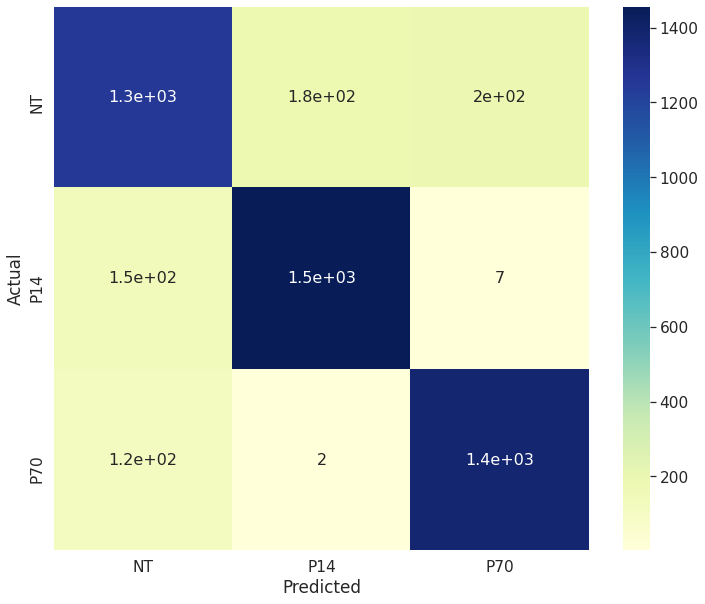

In [262]:
metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(12,10))
cm_array = metrics.confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm_array, index = class_names, columns = class_names)

sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
ax.set(xlabel='Predicted', ylabel='Actual')

plt.show()

In [263]:
model_bytearray = booster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

booster.save_raw = myfun

In [264]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test[features])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [265]:
c_14 = '#E69F00'
c_35 = '#56B4E9'
c_70 = '#009E73'

colors = [c_70, c_35, c_14]
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

In [266]:
class_inds

array([2, 1, 0])

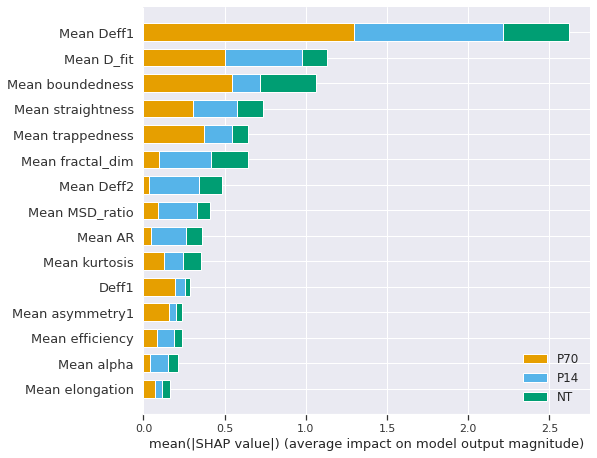

In [267]:
shap.summary_plot(shap_values, X_test[features], class_names=np.array(class_names), max_display=15, title='Total SHAP Values', color=cmap)